#Taller DataScience




###Random Forest
Random forest (o random forests) también conocidos en castellano como '"Bosques Aleatorios"' es una combinación de árboles predictores tal que cada árbol depende de los valores de un vector aleatorio probado independientemente y con la misma distribución para cada uno de estos. Es una modificación sustancial de bagging que construye una larga colección de árboles no correlacionados y luego los promedia.

**Cada árbol es construido usando el siguiente algoritmo:**

Sea N el número de casos de prueba, M es el número de variables en el clasificador.

Sea m el número de variables de entrada a ser usado para determinar la decisión en un nodo dado; m debe ser mucho menor que M

Elegir un conjunto de entrenamiento para este árbol y usar el resto de los casos de prueba para estimar el error.
Para cada nodo del árbol, elegir aleatoriamente m variables en las cuales basar la decisión. Calcular la mejor partición del conjunto de entrenamiento a partir de las m variables.

Para la predicción un nuevo caso es empujado hacia abajo por el árbol. Luego se le asigna la etiqueta del nodo terminal donde termina. Este proceso es iterado por todos los árboles en el ensamblado, y la etiqueta que obtenga la mayor cantidad de incidencias es reportada como la predicción.

In [0]:
from sklearn import datasets
import pandas as pd


In [0]:
####Cargamos la Base de datos iris ###Base de datos de flores utilizable de forma muy simple
iris = datasets.load_iris()

In [8]:
# Vemos cuales son los nombres de las especies de flores(setosa, versicolor,virginica)
print(iris.target_names)

# Vemos el nombre de las caracteristicas####features###

####En una base de datos estandar, esto hace referencia a los nombres de las columnas de datos
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Para poder aplicar cualquier tipo de modelo predictivo, o filtros para analizar datos, hemos de definir nuestra variable objetivo, tambien llamada "Target Variable". En este caso la clase datasets de sklearn, trae definidas y previamente etiquetadas estos objetivos.




---

En un caso general se ha de definir la variable objetivo manualmente (de ahí el nombre de aprendizaje supervisado). 
Para realizar esto, se pueden usar diversos algoritmos y softwares. 

![texto alternativo](https://i.stack.imgur.com/Bo1iY.png)

Ahora vemos cuales son los target de la data a usar. y vemos como estan organizados las features de esta.

In [9]:
# Vemos como se organiza la Data
print(iris.data[0:3])

# Vemos las etiquetas, o labels de nuestra variable objetivo (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Ahora creamos nuestro DataFrame con pandas y verificamos que este correcto

In [10]:
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Ahora de una vez por todas...
Creamos el Modelo!!!

Para esto Usamos la libreria sklearn, libreria muy util y famosa en python para aplicaciones en DataScience

In [0]:
# Importamos la funcion para dividir nuestro DataFrame
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

##Dividimos nuestra data en un conjunto de entrenamiento y otro de testeo. 80% y 20% respectivamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

Ahora, entrenamos el modelo de Random Forest con los Datasets creados

In [20]:
#Importamos el modelo de randomforest
from sklearn.ensemble import RandomForestClassifier


#Create a Gaussian Classifier
Modelo=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
Modelo.fit(X_train,y_train)

y_pred=Modelo.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [21]:
from sklearn import metrics
# Vemos que tan Preciso es el modelo
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


Imprimimos el arbol de decision para observar como se ve

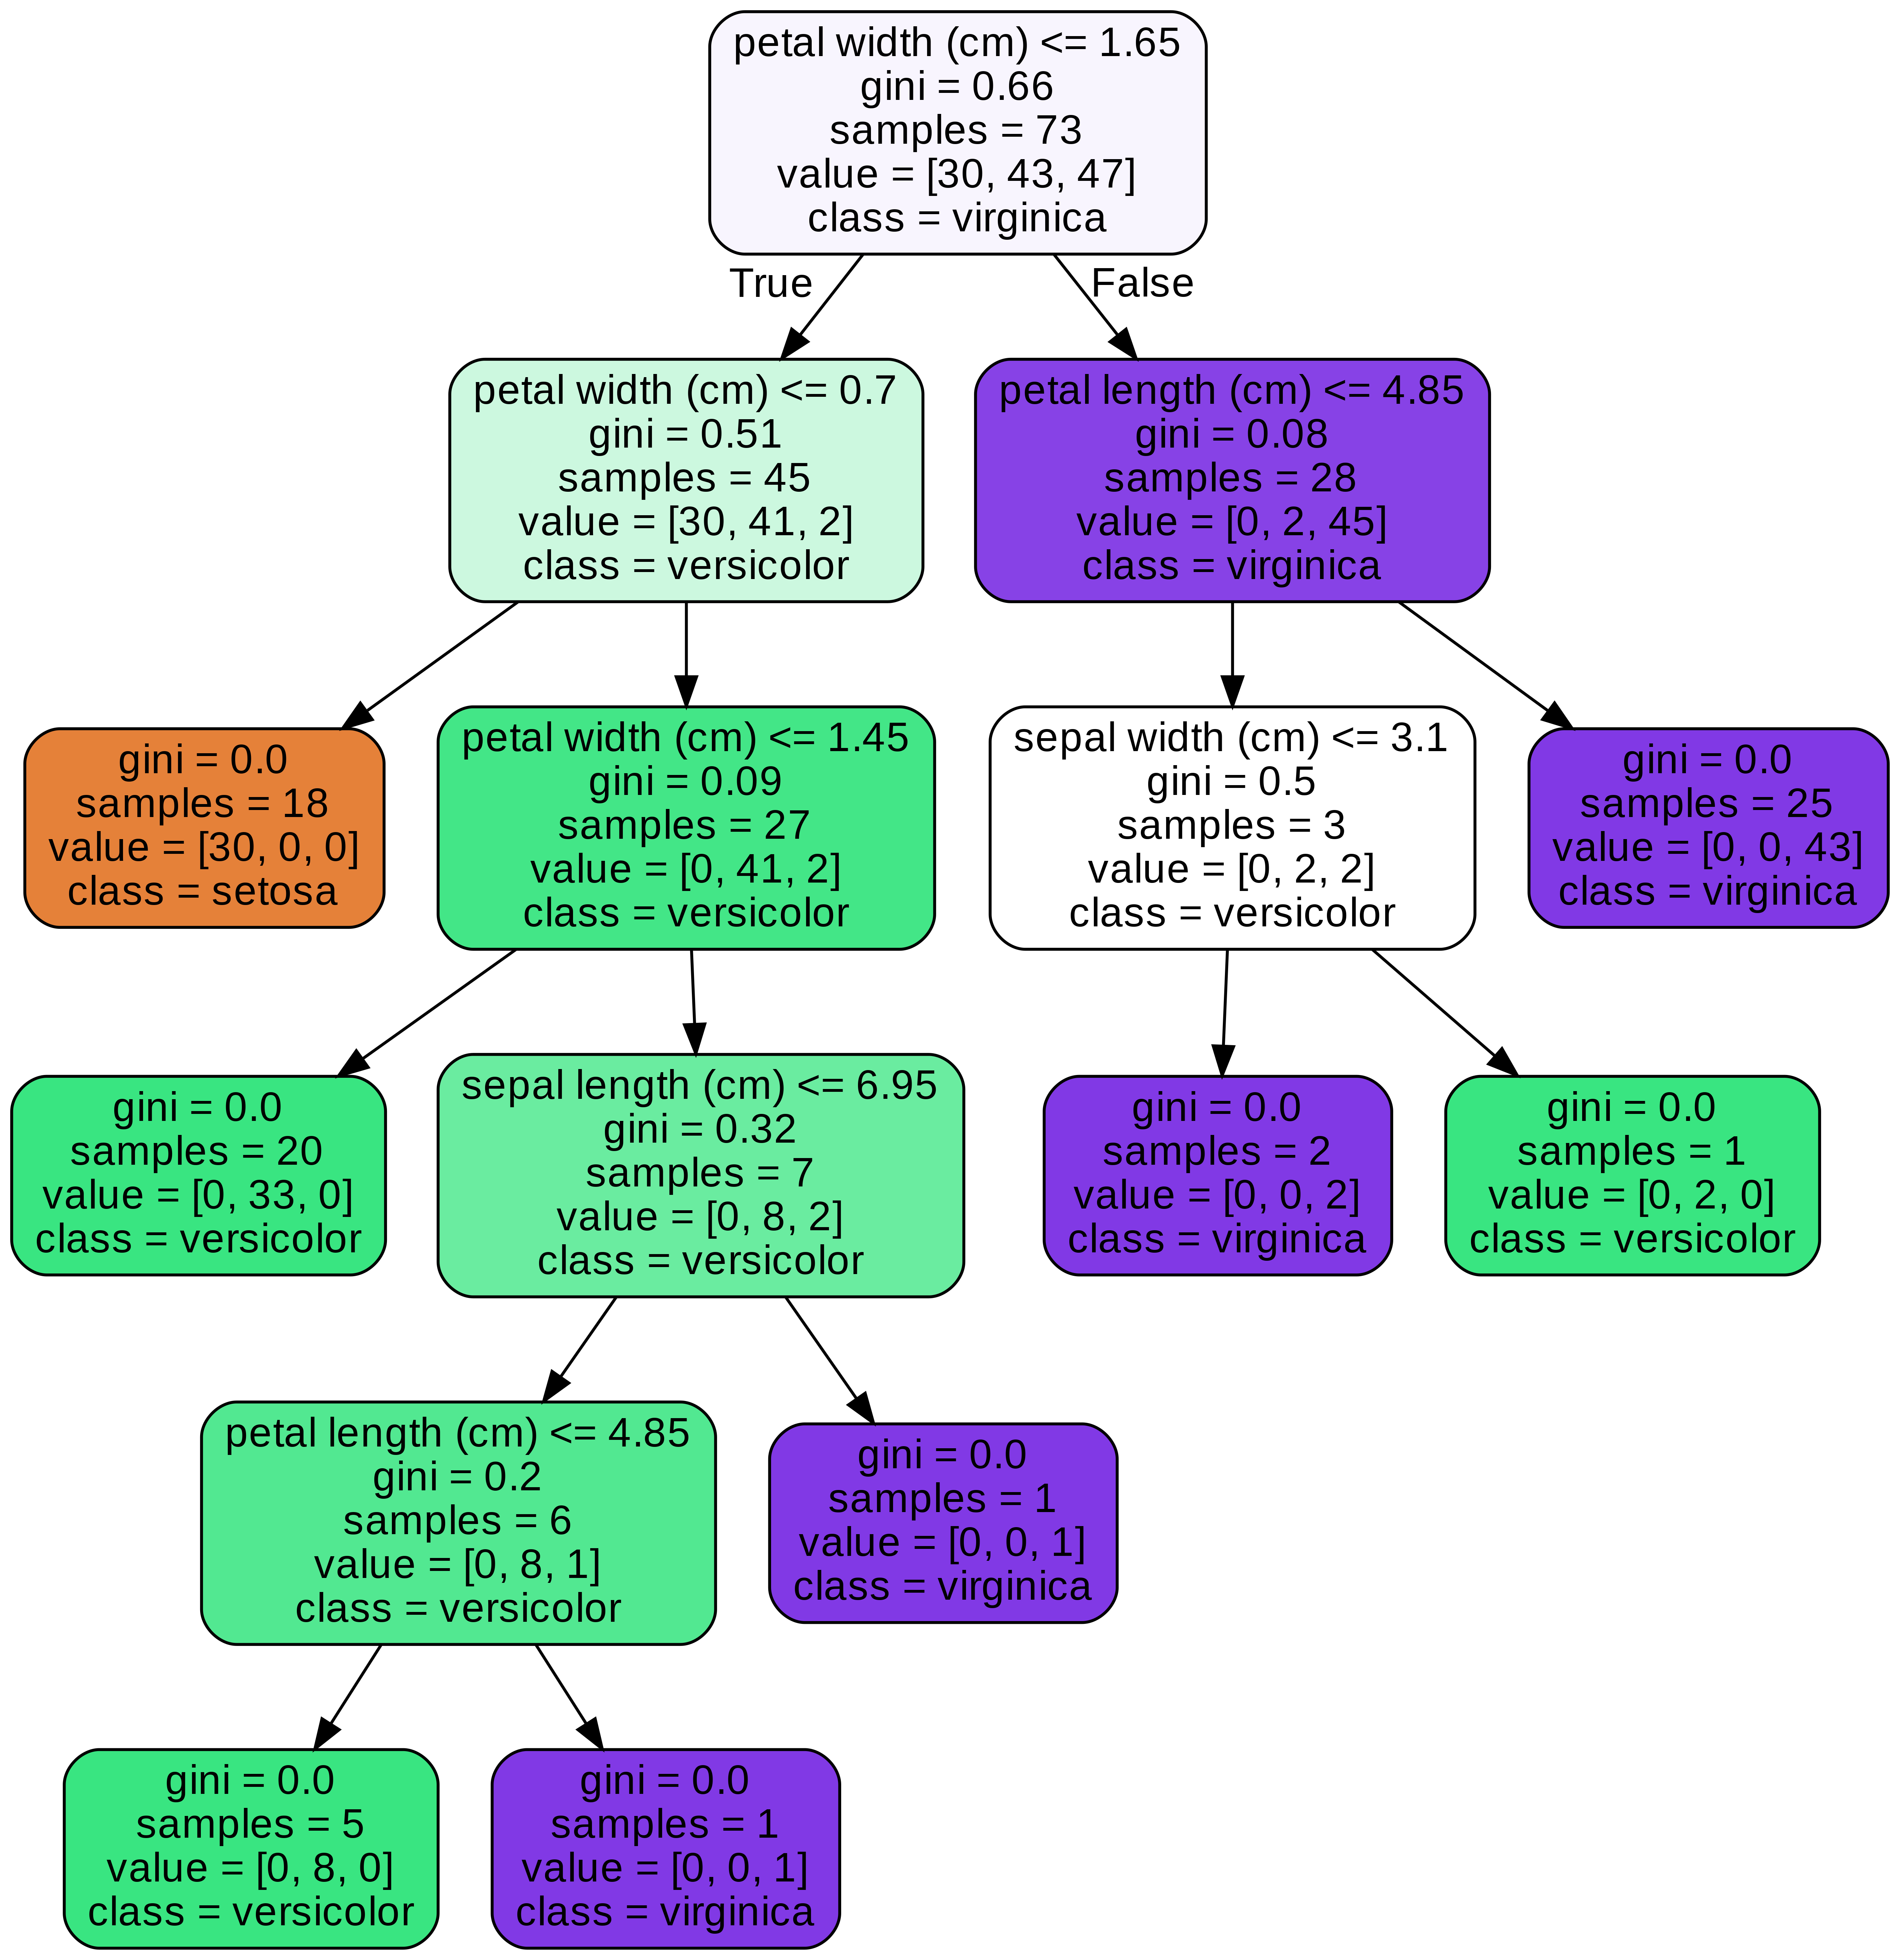

In [28]:
Arbol = Modelo.estimators_[5]
from sklearn.tree import export_graphviz
#Sacamos la imagen
export_graphviz(Arbol, 
                out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)



from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])




from IPython.display import Image
Image(filename = 'tree.png',width=560, height=620)

Ahora realizamos una prediccion con nuestro modelo ya creado


Tenemos un elemento de tipo setosa, con los datos 5.1,	3.5,	1.4,	0.2

In [33]:
Modelo.predict([[5.1, 3.5, 1.4, 0.2]])

array([0])